## **Estudio antropométrico.**

In [ ]:
from scipy.stats import norm
from scipy.stats import kde
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/CN_ANTROPOMETRIA.csv", delimiter=";", decimal=".", encoding="utf-8")
df.head()

In [ ]:
df.info()

In [ ]:
df_h = pd.DataFrame()
df_h = df[['TALLA4_1','EDAD', 'SEXO']]  #Los cambios en la copia no se refrejaran en el original
df_h.shape

(33818, 3)

In [ ]:
df_h = df_h.rename(columns={'TALLA4_1':'Talla','EDAD': 'Edad', 'SEXO': 'Sexo'})
df_h.columns

Index(['Talla', 'Edad', 'Sexo'], dtype='object')

In [ ]:
df_h = (df_h[(df_h['Edad'] >= 18)]).copy(deep = True) #Los cambios en la copia no se refrejaran en el original
df_h = (df_h[(df_h['Talla'] != ' ')]).copy(deep = True)
df_h['Talla']=df_h['Talla'].astype(float)
df_h = (df_h[(df_h['Talla'] <= 220)]).copy(deep = True)
#df_h = (df_h[(df_h['Talla'] >= 110)]).copy(deep = True)
df_h.shape

(14376, 3)

In [ ]:
df_h['Talla'].describe()

count    14376.000000
mean       159.721779
std          9.785370
min        102.500000
25%        152.675000
50%        159.300000
75%        166.500000
max        196.200000
Name: Talla, dtype: float64

In [ ]:
df_m = (df_h[(df_h['Sexo'] == 1)]).copy(deep = True)
df_m.describe()

,Talla,Edad,Sexo
count,6151.000000,6151.000000,6151.0
mean,167.132044,36.715656,1.0
std,7.779056,12.196159,0.0
min,102.500000,18.000000,1.0
25%,162.200000,26.000000,1.0
50%,167.200000,37.000000,1.0
75%,172.100000,47.000000,1.0
max,196.200000,59.000000,1.0


In [ ]:
dfm = pd.DataFrame({
       'Media' : df_m['Talla'].mean(),
       'Mediana': df_m['Talla'].median(),
       'Moda': df_m['Talla'].mode(),
       'Rango': abs(df_m['Talla'].max() - df_m['Talla'].min()),
       'Desviación estándar': df_m['Talla'].std(),
       'Varianza': df_m['Talla'].var()
})
dfm.transpose( )

,0
Media,167.132044
Mediana,167.200000
Moda,170.000000
Rango,93.700000
Desviación estándar,7.779056
Varianza,60.513716


In [ ]:
df_f = (df_h[(df_h['Sexo'] == 2)]).copy(deep = True)
df_f.describe()

,Talla,Edad,Sexo
count,8225.000000,8225.000000,8225.0
mean,154.180073,36.974711,2.0
std,7.094580,11.867032,0.0
min,104.300000,18.000000,2.0
25%,149.500000,27.000000,2.0
50%,154.000000,37.000000,2.0
75%,158.900000,46.000000,2.0
max,181.000000,59.000000,2.0


In [ ]:
dff = pd.DataFrame({
       'Media' : df_f['Talla'].mean(),
       'Mediana': df_f['Talla'].median(),
       'Moda': df_f['Talla'].mode(),
       'Rango': abs(df_f['Talla'].max() - df_f['Talla'].min()),
       'Desviación estándar': df_f['Talla'].std(),
       'Varianza': df_f['Talla'].var()
})
dff.transpose( )

,0
Media,154.180073
Mediana,154.000000
Moda,154.000000
Rango,76.700000
Desviación estándar,7.094580
Varianza,50.333060


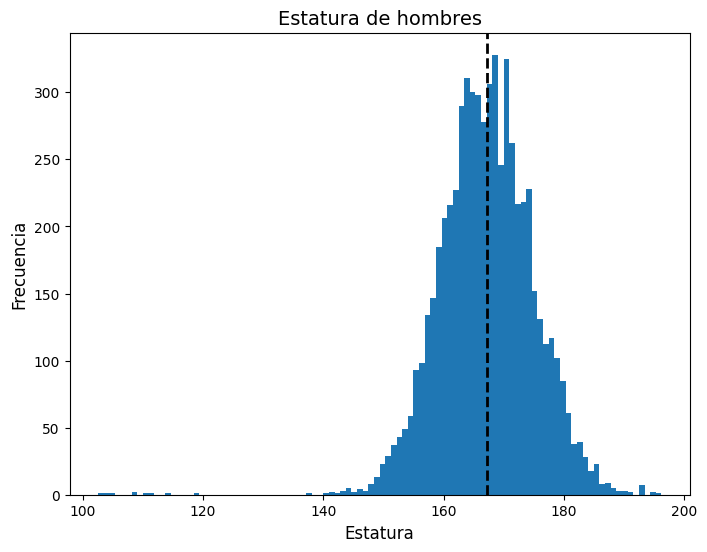

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df_m['Talla'], bins = 100)
plt.xlabel("Estatura", fontsize = 12)
plt.ylabel("Frecuencia", fontsize = 12)
plt.title(r"Estatura de hombres", fontsize = 14)
plt.axvline(df_m['Talla'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

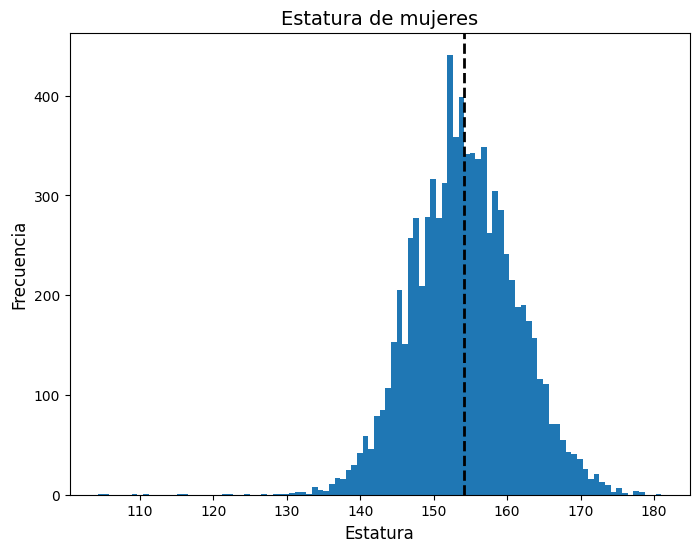

In [ ]:
plt.figure(figsize=(8,6))
xs = np.linspace(100, 200, 100)
plt.hist(df_f['Talla'], bins = 100)
plt.xlabel("Estatura", fontsize = 12)
plt.ylabel("Frecuencia", fontsize = 12)
plt.title(r"Estatura de mujeres", fontsize = 14)
plt.axvline(df_f['Talla'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

<ipython-input-44-b0d5a2e979a2>:1: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(df_m['Talla'])


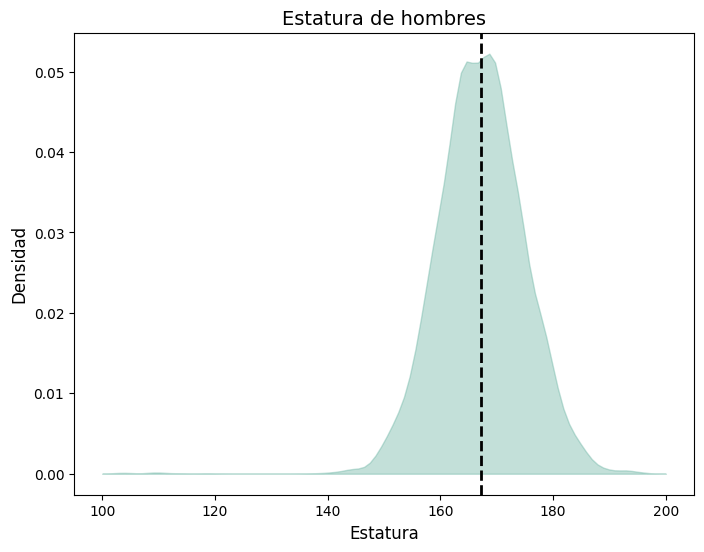

In [ ]:
density = kde.gaussian_kde(df_m['Talla'])

xs = np.linspace(100, 200, 100)

# Set the figure size
plt.figure(figsize=(8,6))

# plot
plt.fill_between( xs, density(xs), color="#69b3a2", alpha=0.4)

# title
plt.xlabel("Estatura", fontsize = 12)
plt.ylabel("Densidad", fontsize = 12)
plt.title(r"Estatura de hombres", fontsize = 14)
plt.axvline(df_m['Talla'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

<ipython-input-43-02805ec92e20>:1: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(df_f['Talla'])


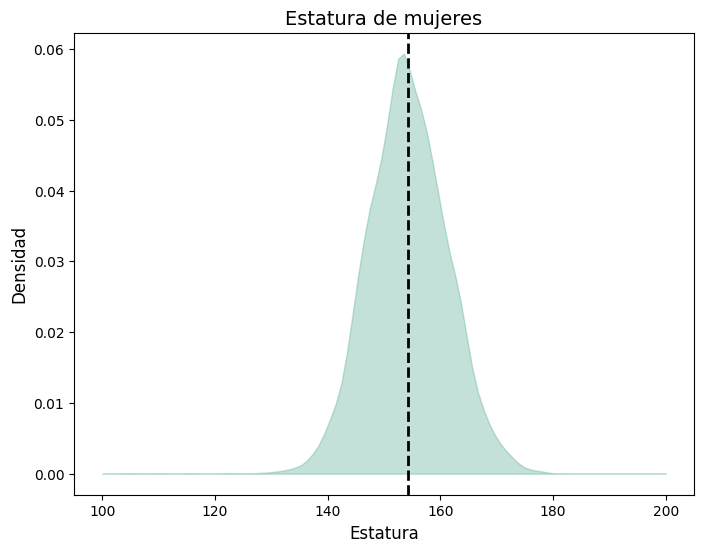

In [ ]:
density = kde.gaussian_kde(df_f['Talla'])

xs = np.linspace(100, 200, 100)

# Set the figure size
plt.figure(figsize=(8,6))

# plot
plt.fill_between( xs, density(xs), color="#69b3a2", alpha=0.4)

# title
plt.xlabel("Estatura", fontsize = 12)
plt.ylabel("Densidad", fontsize = 12)
plt.title(r"Estatura de mujeres", fontsize = 14)
plt.axvline(df_f['Talla'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
mean, var, skew, kurt = norm.stats(df_f['Talla'].mean(), df_f['Talla'].std(), moments = 'mvsk')

print("Media %f"%mean)
print("Varianza %f"%var)
print("Sesgo %f"%skew)
print("Curtosis %f"%kurt)


Media 154.180073
Varianza 50.333060
Sesgo 0.000000
Curtosis 0.000000
